# Find the most repeated game titles in years

Sort game titles by their release year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

data = pd.read_csv("ign.csv")[["title", "score", "release_year"]]     # create a dataFrame object with title, score and release_year

games_by_year = data.sort('release_year')
games_by_year.head()

,title,score,release_year
516,The Walking Dead: The Game -- Episode 1: A New...,8.5,1970
519,Gex,6.0,1996
460,NBA In the Zone,5.0,1996
461,Magic Carpet,7.5,1996
462,Power Serve 3D Tennis,2.0,1996


Just to see if plot works.

2008    1915
2009    1687
2007    1610
2010    1363
2006    1208
2005    1088
2011    1073
2000    1045
2004     997
2003     969
Name: release_year, dtype: int64


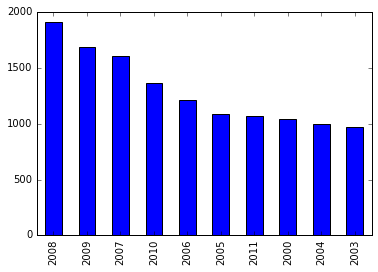

In [2]:
year_counts = games_by_year["release_year"].value_counts()[:10]
print year_counts
year_counts.plot(kind="bar")

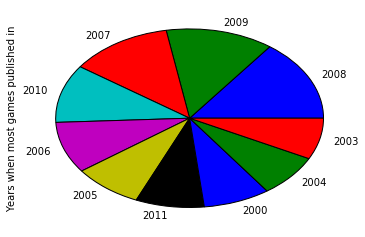

In [3]:
pie = year_counts.plot.pie()
pie.set_ylabel("Years when most games published in")

In [4]:
## the counter function used in further steps

def item_counter(arr, see_how_many):
    item_dict = {}
    for item in arr:
        if item in item_dict:
            item_dict[item] += 1
        else:
            item_dict[item] = 1

    most_used = sorted(item_dict, key = item_dict.get, reverse=True)[:see_how_many]
    
    res = []
    for item in most_used:
        res.append((item, item_dict[item]))

    df = pd.DataFrame.from_records(res, columns=("name", "frequency"))
    df.sort("frequency")
    return df

In [5]:
# find the most used game name in 1996

# game_names_in_96 = games_by_year.loc[games_by_year["release_year"] == 2009]["title"]


############ TODO: game_names_in_96 = games_by_year["title"]  should give all titles
############ game_names_in_96 = games_by_year["title"]
game_names_in_96 = games_by_year["title"]


#with pd.option_context('display.max_rows', 999):
   # print game_names_in_96



###################################
######## TODO: make this a function ########
###################################
import numpy as np
import re
import nltk
## from nltk.stem.snowball import SnowballStemmer
## stemmer = SnowballStemmer("english")
words = []
not_wanted = ["i", "ii", "iii", "iv", "v", "vi", "vii", "fifa", "nba", "nfl", "vs", "k", "one", "two", "three", "four"]
# Split the game names by words and extend the words array.
for name in game_names_in_96:
    ##### use nltk tokenize to see what happens ####### words_in_name = name.split(" ")
    words_in_name = nltk.word_tokenize(name)
    # As splitting names, lower the characters to help them be found in stopwords. For instance: 
    # "the" in stopwords is True and "The" in stopwords is False
    for i in range(0, len(words_in_name)):
        re_form = re.sub(r'[^a-zA-Z ]', '', words_in_name[i]).split()
        if (len(re_form) > 0):
            words_in_name[i] = re_form[0].lower()
            if not (words_in_name[i] in not_wanted):
                words.append(words_in_name[i])
                #words_in_name[i] = stemmer.stem(words_in_name[i])

#print len(words)
#series = pd.Series(np.array(words))    # find out why this was necessary #

#without_preprocess = item_counter(words, 3)
#print "without_preprocess: ", without_preprocess

Get rid of stopwords and numbers

In [6]:
from nltk.corpus import stopwords


# Get rid of stopwords and numbers in words array to analyze better.
sw = stopwords.words("english")
for i in sw:
    while i in words:
        words.remove(i)

for i in words:
    
    if not len(re_form):
        words.remove(i)

##################################
######## TODO: solve TFIDF magic ########
##################################

####################### TFIDF - seemed unnecessary ######################    
# from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(stop_words="english", lowercase=True)
#bag_of_words = vectorizer.transform(words)
#feature_names = []
#for i in vectorizer.get_feature_names():
    #feature_names.append(str(i))
####################### TFIDF - seemed unnecessary ######################    



####################### COUNT VECTORIZER - seemed unnecessary ######################    
#altogether = ""
#for i in words:
    #altogether = altogether + " " + i
#print "altogether: ", altogether
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer()
#bag_of_words = vectorizer.fit([altogether])
#bag_of_words = vectorizer.transform([altogether])
####################### COUNT VECTORIZER - seemed unnecessary ######################    

with_preprocess = item_counter(words, 100)
with_preprocess
# print "with_preprocess: ", with_preprocess


,name,frequency
0,edition,422
1,world,388
2,game,372
3,star,291
4,wars,271
5,dead,222
6,super,218
7,episode,210
8,dragon,207
9,racing,204


//TODO: Find the most repeated game names in different categories

//TODO: Find the most repeated game names in different seasons

//TODO: Generate game names that are > 7.5